In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [4]:
def generate_month_forecast_figure_168_normalized(path, month_idx, month=0, save=False):
    observed = []
    predicted = []
    
    eia_data = pd.read_csv("../data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv")
    data_2023 = eia_data[eia_data["2023"]==1]

    actual_month = month+1
    
    eia_forecast_data = data_2023[data_2023["month"]==actual_month]["Normalized Forecast"].tolist()

    
    with open(path, 'r') as file:
        data = json.load(file)
        print(len(data['source_readings']))

        # Step 1: find start index
        start_idx = 0
        while True:
            source = data['source_readings'][start_idx]
#             for s in source:
#                 print(s)
            m = source[0][month_idx]
            if m == month:
                break
            else:
                start_idx += 1

        idx = start_idx-7
        print(idx)
        while True:
#             try:
            source = data['source_readings'][min(idx+7, len(data['source_readings'])-1)]
#             except:
#                 expected_ex = data['expected'][idx]
#                 predicted_ex = data['predicted'][idx]
#                 observed += expected_ex
#                 predicted += predicted_ex
#                 idx +=1
#                 continue

            m = source[0][month_idx]
            if m != month or idx > len(data['source_readings'])-1:
                break
            expected_ex = data['expected'][idx]
            predicted_ex = data['predicted'][idx]

            
            observed += expected_ex
            predicted += predicted_ex
            
            idx +=1
        predicted = predicted
        observed= observed
        eia_forecast_data=eia_forecast_data
        
        plt.figure(figsize=(16, 6))  # Set the figure size for better visibility
        plt.plot(observed,linestyle='-', c='r', marker='.', linewidth=1, alpha=0.7, label="Observed")
        plt.plot(predicted,linestyle='-', c='b', marker='.', linewidth=1, alpha=0.7, label="Model 24h Forecast")
#         plt.plot(eia_forecast_data,linestyle='-', c='g', marker='.', alpha=0.7, label="EIA 24h Forecast")
#         plt.title(f"C7 2023 Forecast Example for Month {actual_month}")
        plt.xlabel('Hour')
        plt.ylabel('Demand (Normalized)')
        plt.legend()
        if save:
            print("saving")
            print(path)
            code = path.split("/")[2].split("_")[0]
            plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/{code}_{actual_month}_predictions.pdf", 
                        format="pdf", 
                        bbox_inches="tight")
            print("Saved")
        plt.show()
        
        model_rmse = rmse(predicted, observed)
#         eia_rmse = rmse(eia_forecast_data, observed)
        
        print(f"Model RMSE: {model_rmse}")
#         print(f"EIA RMSE: {eia_rmse}")

In [5]:
# def rmse(output, target):
#     output = np.array(output)
#     target = np.array(target)
#     loss = np.sqrt(np.mean((output - target) ** 2))
#     return loss

358
24


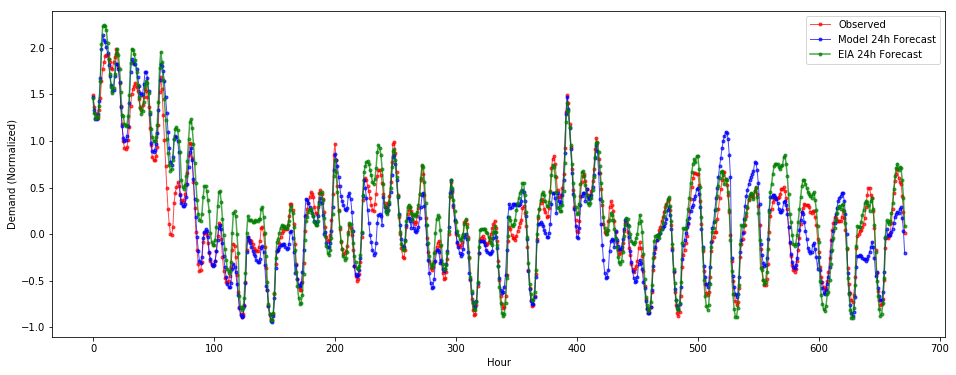

Model RMSE: 0.22284280046506985
EIA RMSE: 0.1988088781114321


In [346]:
generate_month_forecast_figure_168_normalized("../model_outputs/F8_erco_2023_example_outputs.json",
                               month_idx=6, 
                               month=1, 
                               save=False)

In [19]:
def generate_month_forecast_figure_unnormalized(path, 
                                                month_idx, 
                                                mean, 
                                                std, 
                                                month=0, 
                                                input_days=7, 
                                                save=False):
    actual_month = month+1
    observed = []
    predicted = []
    
    eia_data = pd.read_csv("../data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv")
    data_2023 = eia_data[(eia_data["2023"]==1) & (eia_data["year"]==2023)]    
    
    eia_forecast_data = data_2023[data_2023["month"]==actual_month]["Demand Forecast (MWh)"].tolist()
    
    with open(path, 'r') as file:
        data = json.load(file)
        print(len(data['source_readings']))

        # Step 1: find start index
        start_idx = 0 if month != 11 else input_days
        while True:
            source = data['source_readings'][start_idx]
            m = source[0][month_idx]
            if m == month:
                break
            else:
                start_idx += 1

        idx = start_idx-input_days
        print(idx)
        while True:
            source = data['source_readings'][min(idx+input_days, len(data['source_readings'])-1)]

            m = source[0][month_idx]
            if m != month or idx > len(data['source_readings'])-1:
                break
            expected_ex = data['expected'][idx]
            predicted_ex = data['predicted'][idx]

            
            observed += expected_ex
            predicted += predicted_ex
            
            idx +=1
        predicted = np.array(predicted)*std+mean
        observed= np.array(observed)*std+mean
        eia_forecast_data=eia_forecast_data
        plt.figure(figsize=(16, 6))  # Set the figure size for better visibility
        plt.plot(observed,linestyle='-', c='r', marker='.', linewidth=1, alpha=0.7, label="Observed")
        plt.plot(predicted,linestyle='-', c='b', marker='.', linewidth=1, alpha=0.7, label="Model 24h Forecast")
#         plt.plot(eia_forecast_data,linestyle='-', c='g', marker='.', alpha=0.7, label="ERCOT 24h Forecast")
        plt.xlabel('Hour')
        plt.ylabel('Demand (MWh)')
        plt.legend()
        if save:
            print("saving")
            print(path)
            code = path.split("/")[2].split("_")[0]
            plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/{code}_{actual_month}_predictions.pdf", 
                        format="pdf", 
                        bbox_inches="tight")
            print("Saved")
        plt.show()
        
        model_rmse = rmse(predicted, observed)
        model_mae = mean_absolute_error(observed, predicted)
        model_mape = mape(observed, predicted)
#         eia_rmse = rmse(eia_forecast_data, observed)
        
        print(f"Model RMSE: {model_rmse}")
        print(f"Model MAE: {model_mae}")
        print(f"Model MAPE: {model_mape}")
#         print(f"EIA RMSE: {eia_rmse}")
        
#         return (model_rmse, eia_rmse)
        return model_rmse
        
        

365
0
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


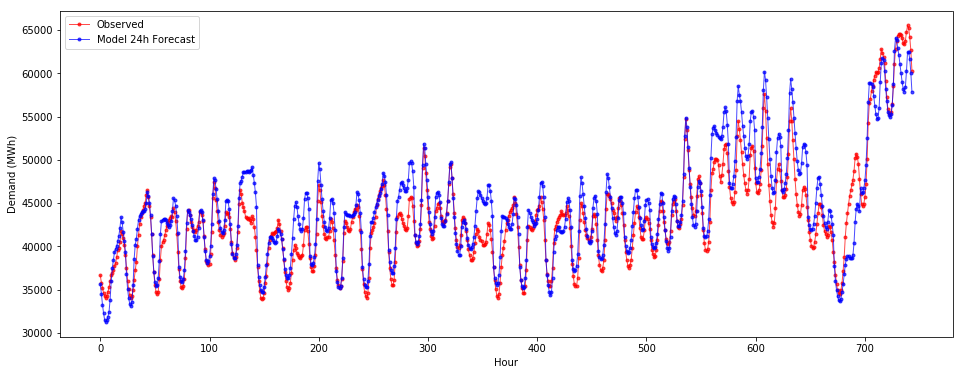

Model RMSE: 2439.8996716796414
Model MAE: 1832.620932632267
Model MAPE: 4.165402246786124
365
31
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


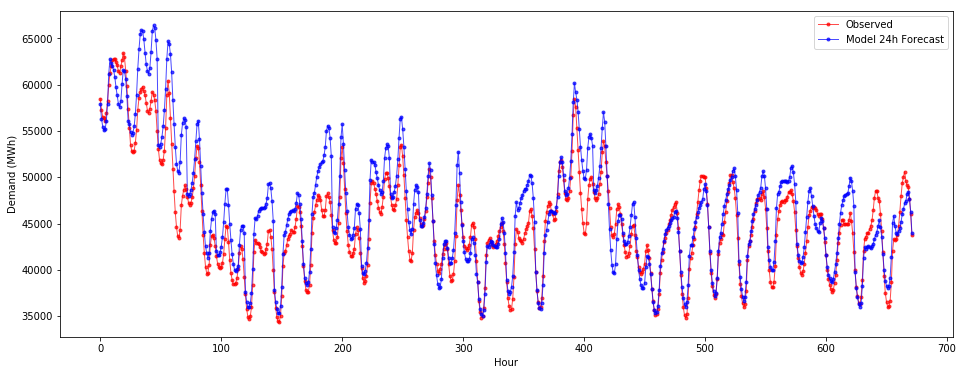

Model RMSE: 2667.837037369285
Model MAE: 2033.9046501585663
Model MAPE: 4.412067101627378
365
59
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


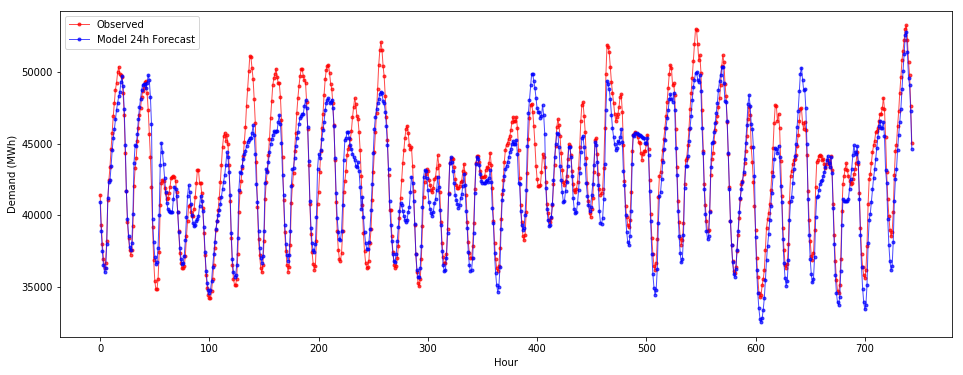

Model RMSE: 1694.6502817116786
Model MAE: 1324.7284625824097
Model MAPE: 3.032659300045977
365
90
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


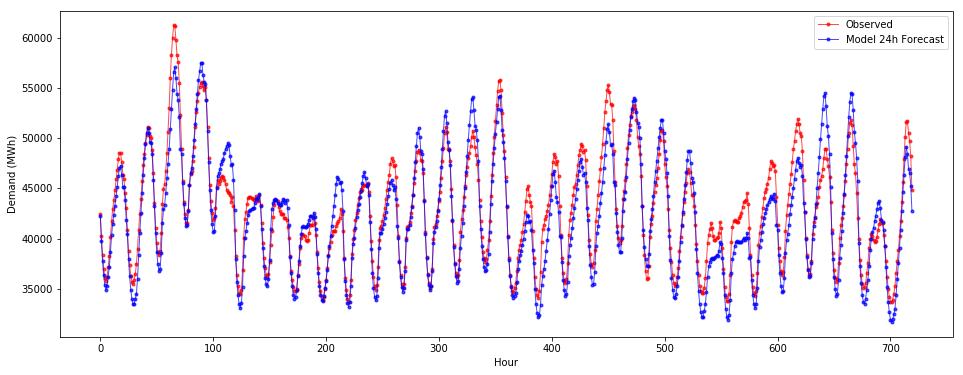

Model RMSE: 1917.4076141054672
Model MAE: 1520.0595920256585
Model MAPE: 3.4863453489228813
365
120
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


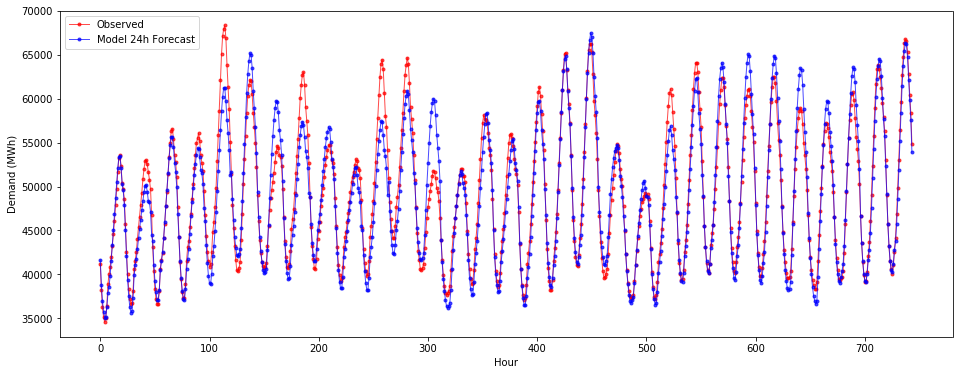

Model RMSE: 2134.082561067227
Model MAE: 1509.2967290640374
Model MAPE: 2.923723222097792
365
151
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


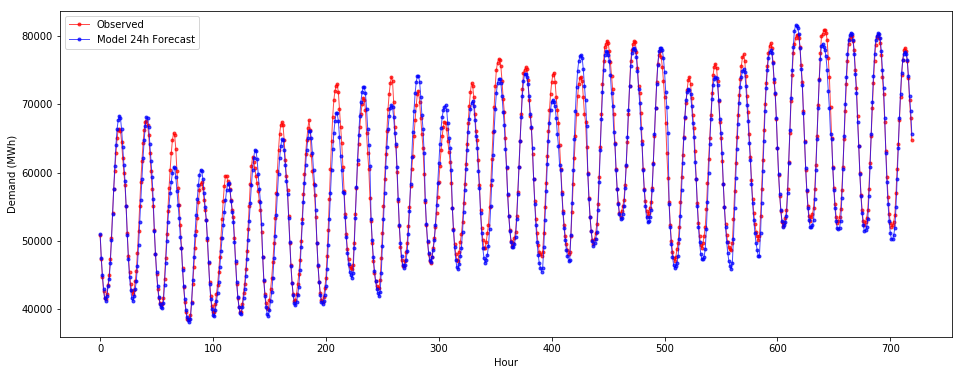

Model RMSE: 1793.3128944309242
Model MAE: 1360.3603209444163
Model MAPE: 2.251539177519053
365
181
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


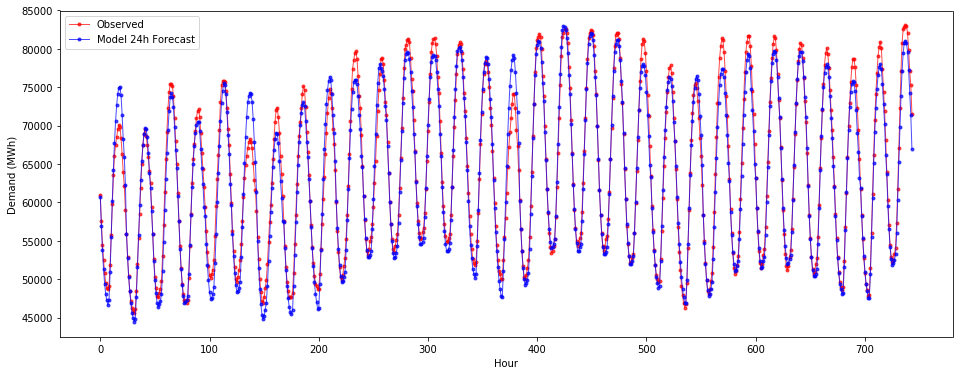

Model RMSE: 1785.323622293744
Model MAE: 1295.3034915439537
Model MAPE: 1.9894220579283588
365
212
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


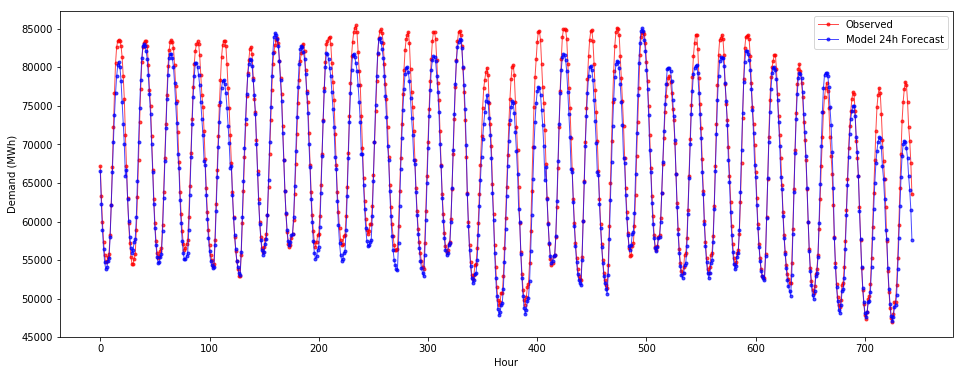

Model RMSE: 2242.592404526788
Model MAE: 1635.1274651881101
Model MAPE: 2.289529700294703
365
243
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


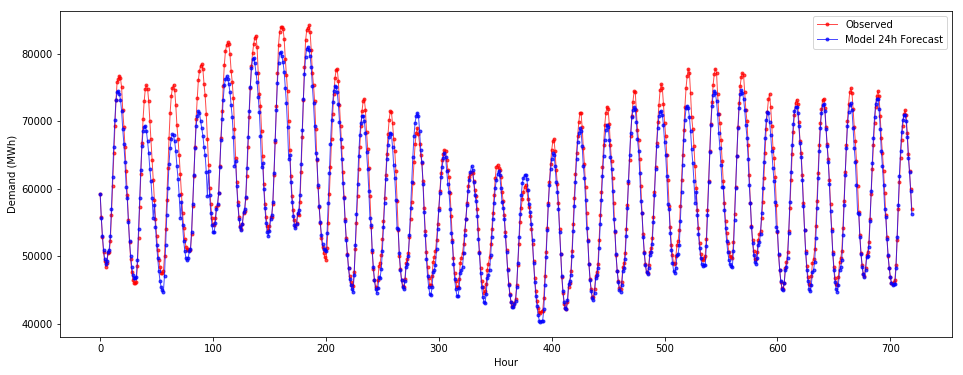

Model RMSE: 2304.0217316151266
Model MAE: 1589.7629368733499
Model MAPE: 2.469740289320097
365
273
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


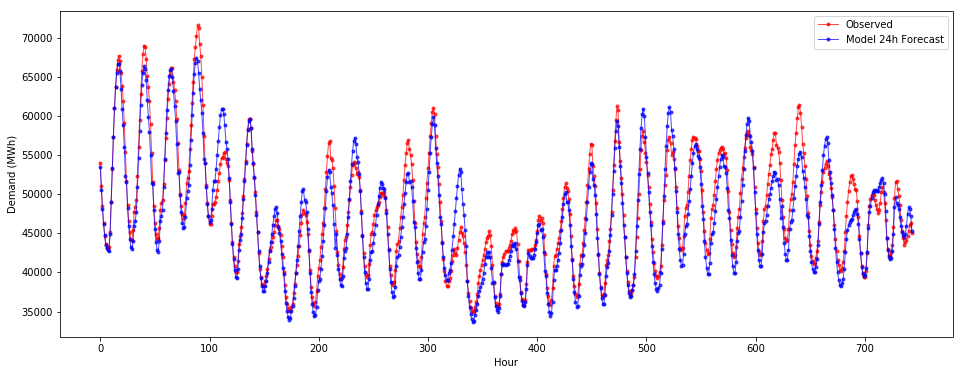

Model RMSE: 2180.5768622841138
Model MAE: 1684.9900461876032
Model MAPE: 3.4376860999412133
365
304
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


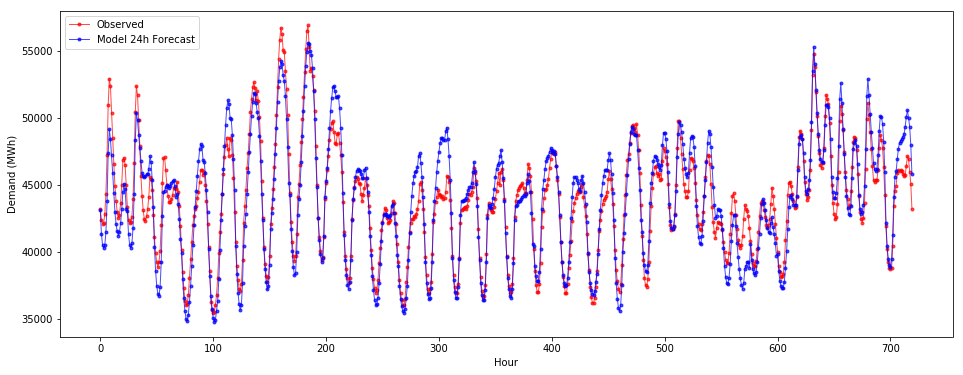

Model RMSE: 1453.1333607586148
Model MAE: 1135.0283955754037
Model MAPE: 2.570598380925531
365
334
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


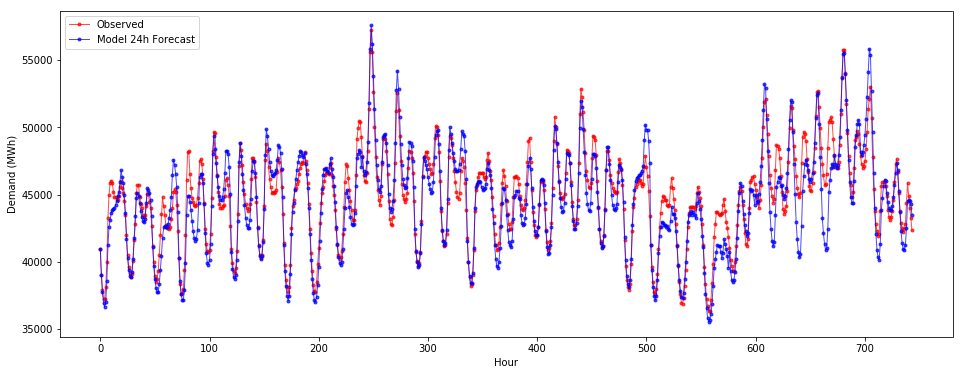

Model RMSE: 1369.7930888427477
Model MAE: 1002.6470099708619
Model MAPE: 2.2122042412400185


In [20]:
rmses = [generate_month_forecast_figure_unnormalized("../model_outputs/A11_erco_2023_example_outputs.json",
                                                month_idx=7, 
                                                month=m, 
                                                mean=43558.95,
                                                std=10011.015,
                                                input_days=1,
                                                save=True) for m in range(12)]

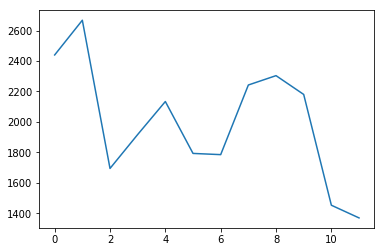

In [13]:
plt.plot(rmses)

In [9]:
[r[0] for r in rmses]

[2439.8996716796414,
 2667.837037369285,
 1694.6502817116786,
 1917.4076141054672,
 2134.082561067227,
 1793.3128944309242,
 1785.323622293744,
 2242.592404526788,
 2304.0217316151266,
 2180.5768622841138,
 1453.1333607586148,
 1369.7930888427477]

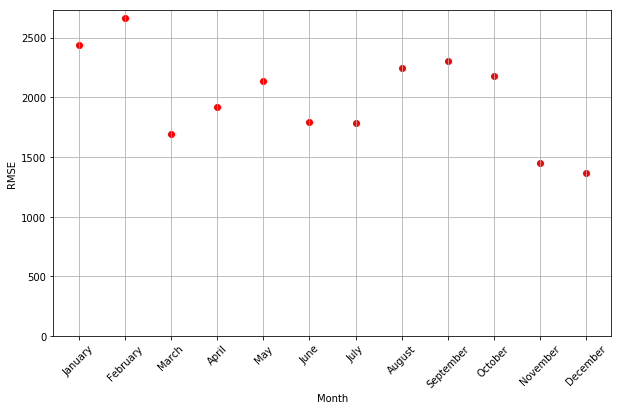

In [17]:
# Unpack the tuples into separate lists


month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
plt.scatter(month_names, rmses, marker='o', color='red')
# plt.scatter(month_names, model_rmse, marker='x', color='blue', label='A11 RMSE')
# plt.scatter(month_names, eia_rmse, marker='s', color='red', label='ERCOT RMSE')

# Label the axes
plt.xlabel('Month')
plt.ylabel('RMSE')

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Add a title
# plt.title('Monthly Comparison of Model RMSE vs ERCOT RMSE')

# Add a legend
# plt.legend()

# Add a grid
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/A11_monthly_rmse.pdf", 
            format="pdf", 
            bbox_inches="tight")

# Show the plot
plt.show()

In [18]:
rmses

[2439.8996716796414,
 2667.837037369285,
 1694.6502817116786,
 1917.4076141054672,
 2134.082561067227,
 1793.3128944309242,
 1785.323622293744,
 2242.592404526788,
 2304.0217316151266,
 2180.5768622841138,
 1453.1333607586148,
 1369.7930888427477]

365
334
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


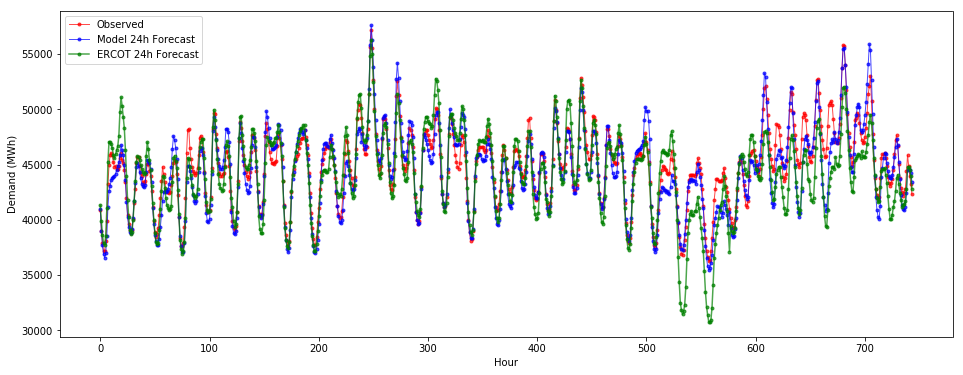

Model RMSE: 1369.7930888427477
EIA RMSE: 2046.2358498780034


(1369.7930888427477, 2046.2358498780034)

In [556]:
generate_month_forecast_figure_unnormalized("../model_outputs/A11_erco_2023_example_outputs.json",
                                                month_idx=7, 
                                                month=11, 
                                                mean=43558.95,
                                                std=10011.015,
                                                input_days=1,
                                                save=True)

365
90
saving
../model_outputs/A11_erco_2023_example_outputs.json
Saved


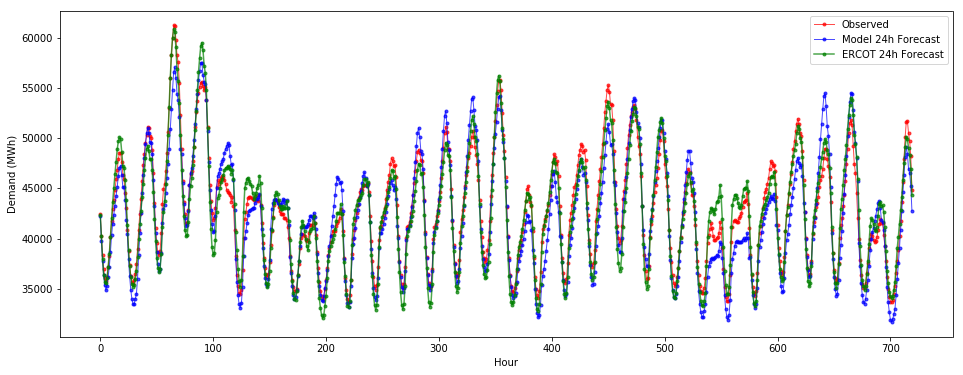

Model RMSE: 1917.4076141054672
EIA RMSE: 1372.673187789897


(1917.4076141054672, 1372.673187789897)

In [557]:
generate_month_forecast_figure_unnormalized("../model_outputs/A11_erco_2023_example_outputs.json",
                                                month_idx=7, 
                                                month=3, 
                                                mean=43558.95,
                                                std=10011.015,
                                                input_days=1,
                                                save=True)

365
334


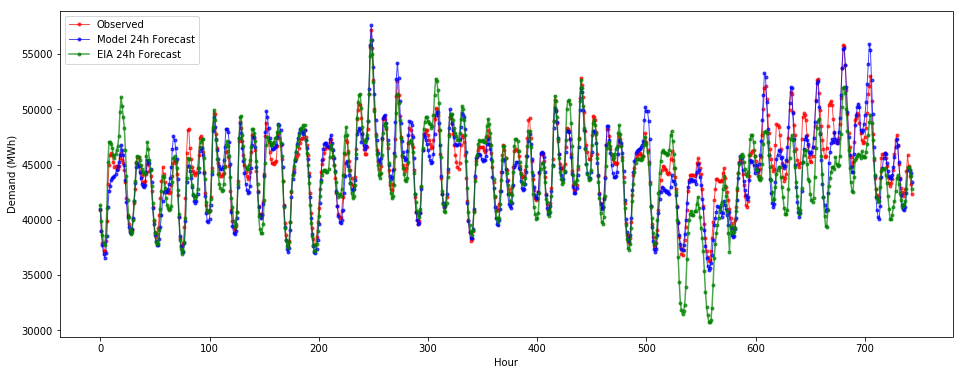

Model RMSE: 1369.7930888427477
EIA RMSE: 2046.2358498780034


(1369.7930888427477, 2046.2358498780034)

In [523]:
generate_month_forecast_figure_unnormalized("../model_outputs/A11_erco_2023_example_outputs.json",
                                                month_idx=7, 
                                                month=11, 
                                                mean=43558.95,
                                                std=10011.015,
                                                input_days=1,
                                                save=False)

In [10]:
def generate_hourly_metrics(
    path: str,
    months: [int],
    days: [int],
    month_idx: int,
    mean: int,
    std: int,
    save=False,
    input_days=7
):
    """
    Month: [0,11]
    Day: [0,6]
    day_of_week: {4: 0, 5: 1, 6: 2, 0: 3, 1: 4, 2: 5, 3: 6}
    """
    months_map = {1: "January", 
                 2: "February",
                 3: "March",
                 4: "April",
                 5: "May",
                 6: "June",
                 7: "July",
                 8: "August",
                 9: "September",
                 10: "October",
                 11: "November",
                 12: "December",}
    days_map = {0: "Monday",
                1:"Tuesday",
                2:"Wednesday",
                3:"Thursday",
                4:"Friday",
                5:"Saturday",
                6:"Sunday",}
    #Function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Function to calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    observed = []
    predicted = []

    eia_data = pd.read_csv(
        "../data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv"
    )
    data_2023 = eia_data[(eia_data["2023"] == 1) & (eia_data["year"] == 2023)]

    actual_months = [m + 1 for m in months]
    df = data_2023[data_2023["month"].isin(actual_months)][
        ["day_of_week", "hour", "Demand Forecast (MWh)"]
    ]
    df.rename(
        columns={
           "Demand Forecast (MWh)": "eia_forecast" 
        },
        inplace=True
    
    )
    
    with open(path, "r") as file:
        data = json.load(file)

        for month in months:
            # Step 1: find start index
            start_idx = 0 if month != 11 else input_days
            while True:
                source = data["source_readings"][start_idx]
                m = source[0][month_idx]
                if m == month:
                    break
                else:
                    start_idx += 1

            idx = start_idx - input_days
            while True:
                source = data["source_readings"][
                    min(idx + input_days, len(data["source_readings"]) - 1)
                ]

                m = source[0][month_idx]
                if m != month or idx > len(data["source_readings"]) - 1:
                    break
                expected_ex = data["expected"][idx]
                predicted_ex = data["predicted"][idx]

                observed += expected_ex
                predicted += predicted_ex

                idx += 1
        predicted = np.array(predicted) * std + mean
        observed = np.array(observed) * std + mean
        
        df["predicted"] = predicted
        
        df["observed"] = observed
        
#         df_pred = df["predicted"]
#         df_pred.to_csv("/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/model_outputs/A11_2023_preds.csv")
        
        
        
        df_filtered = df[df['day_of_week'].isin(days)]
        
        print(f"Model RMSE: {rmse(np.array(df_filtered['predicted']),np.array(df_filtered['observed']))}")
        print(f"EIA RMSE: {rmse(np.array(df_filtered['eia_forecast']), np.array(df_filtered['observed']))}")
        print(f"Model MAE: {mean_absolute_error(np.array(df_filtered['predicted']),np.array(df_filtered['observed']))}")
        print(f"EIA MAE: {mean_absolute_error(np.array(df_filtered['observed']),np.array(df_filtered['eia_forecast']))}")
        print(f"Model MAPE: {mape(np.array(df_filtered['observed']),np.array(df_filtered['predicted']))}")
        print(f"EIA MAPE: {mape(np.array(df_filtered['observed']), np.array(df_filtered['eia_forecast']))}")
        
        
#         plt.figure()
#         plt.plot(np.array(df_filtered['predicted']))
#         plt.plot(np.array(df_filtered['observed']))
#         plt.show()
              
#         plt.figure()
#         plt.plot(np.array(df_filtered['eia_forecast']))
#         plt.plot(np.array(df_filtered['observed']))
#         plt.show()
        
        
        # Initialize a DataFrame to store the results
        results = pd.DataFrame(columns=['Hour', 'Metric', 'EIA_Forecast', 'Predicted'])

        # Loop over each hour
        for hour in df_filtered['hour'].unique():
            # Filter the DataFrame by the current hour
            df_hour = df_filtered[df_filtered['hour'] == hour]

            # Calculate metrics
            rmse_eia = rmse(df_hour['observed'], df_hour['eia_forecast'])
            mae_eia = mean_absolute_error(df_hour['observed'], df_hour['eia_forecast'])
            mape_eia = mape(df_hour['observed'], df_hour['eia_forecast'])

            rmse_pred = rmse(df_hour['observed'], df_hour['predicted'])
            mae_pred = mean_absolute_error(df_hour['observed'], df_hour['predicted'])
            mape_pred = mape(df_hour['observed'], df_hour['predicted'])

            # Append results to the results DataFrame
            results = results.append({'Hour': hour, 'Metric': 'RMSE', 'EIA_Forecast': rmse_eia, 'Predicted': rmse_pred}, ignore_index=True)
            results = results.append({'Hour': hour, 'Metric': 'MAE', 'EIA_Forecast': mae_eia, 'Predicted': mae_pred}, ignore_index=True)
            results = results.append({'Hour': hour, 'Metric': 'MAPE', 'EIA_Forecast': mape_eia, 'Predicted': mape_pred}, ignore_index=True)

        # Pivot the results for easier comparison
        pivot_results = results.pivot(index='Hour', columns='Metric', values=['EIA_Forecast', 'Predicted'])
        
        df_metrics = pivot_results
        # Plot settings
        plt.figure(figsize=(18, 6))

        # List of metrics to plot
        metrics = ['RMSE', 'MAE', 'MAPE']

        label = path.split('/')[-1].split('_')[0]
              
        # Plot each metric
        for i, metric in enumerate(metrics, 1):
            plt.subplot(1, 3, i)  # 1 row, 3 columns, ith subplot
            plt.plot(df_metrics.index, df_metrics[('EIA_Forecast', metric)], label='ERCOT', marker='o')
            plt.plot(df_metrics.index, df_metrics[('Predicted', metric)], label=label, marker='x')
            plt.title(f'{metric} by Hour')
            plt.xlabel('Hour')
            plt.ylabel(metric)
            plt.legend()
            plt.ylim(bottom=0)
            plt.grid(True)
        plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # Adjust the top margin to increase space for the suptitle

        
        # Add a master title
#         plt.suptitle(f'Forecast Accuracy for Months {[months_map[m] for m in actual_months]}\n and Days {[days_map[d] for d in days]}', fontsize=16, fontweight='bold')
        
        if save:
            title=path.split('/')[-1].split('_')[0]+'_' + ''.join(str(m) for m in actual_months) + '_' + ''.join(str(d) for d in days)
            plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/SpringInterimReport/{title}.pdf", 
                            format="pdf", 
                            bbox_inches="tight")
        plt.show()

        return pivot_results

Model RMSE: 2029.7124085235066
EIA RMSE: 1771.7003102984756
Model MAE: 1490.2241255321953
EIA MAE: 1299.4786533756733
Model MAPE: 2.9272712538754884
EIA MAPE: 2.604292160590841


/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


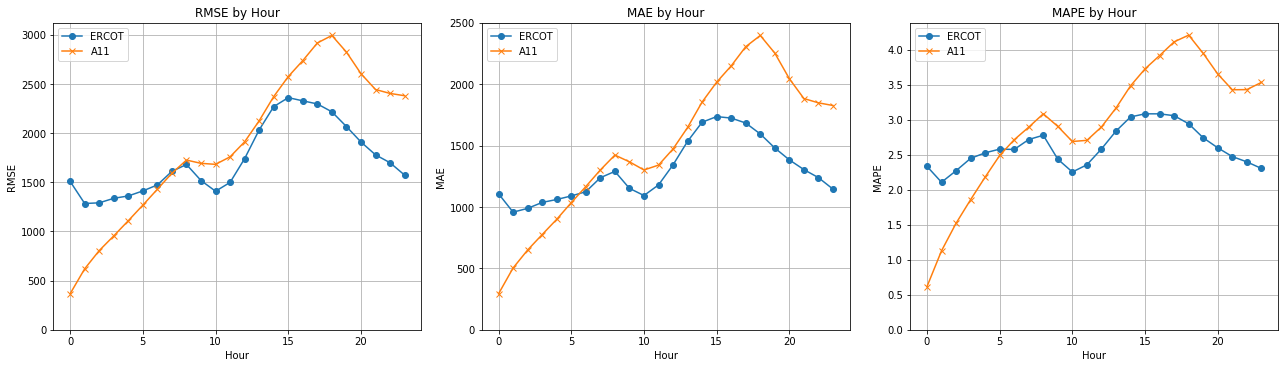

In [11]:
df_metrics = generate_hourly_metrics("../model_outputs/A11_erco_2023_example_outputs.json",
                       months=[0,1,2,3,4,5,6,7,8,9,10,11],
                       days=[0,1,2,3,4,5,6],
                       month_idx=7,
                       mean=43558.95,
                       std=10011.015,
                       input_days=1,
                       save=True)

Model RMSE: 2466.5801271654004
EIA RMSE: 1771.7003102984756
Model MAE: 1833.2323916492287
EIA MAE: 1299.4786533756733
Model MAPE: 3.461597413774747
EIA MAPE: 2.604292160590841


/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


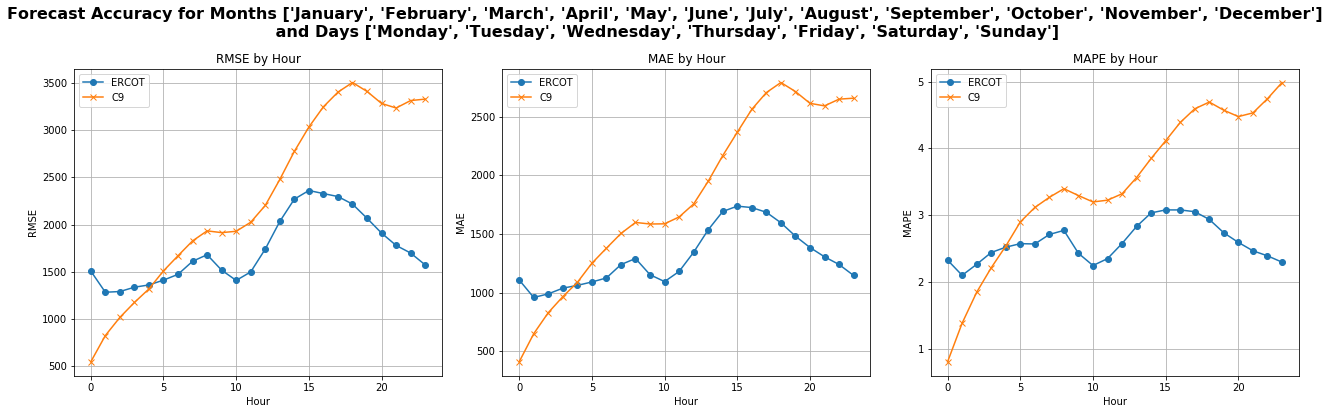

In [453]:
df_metrics = generate_hourly_metrics("../model_outputs/C9_erco_2023_example_outputs.json",
                       months=[0,1,2,3,4,5,6,7,8,9,10,11],
                       days=[0,1,2,3,4,5,6],
                       month_idx=6,
                       mean=43558.95,
                       std=10011.015,
                        input_days=2)

Model RMSE: 1667.264116265049
EIA RMSE: 1952.0274598856113
Model MAE: 1261.4895555453295
EIA MAE: 1414.608976425853
Model MAPE: 2.8549597121004044
EIA MAPE: 3.316472103143871


/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


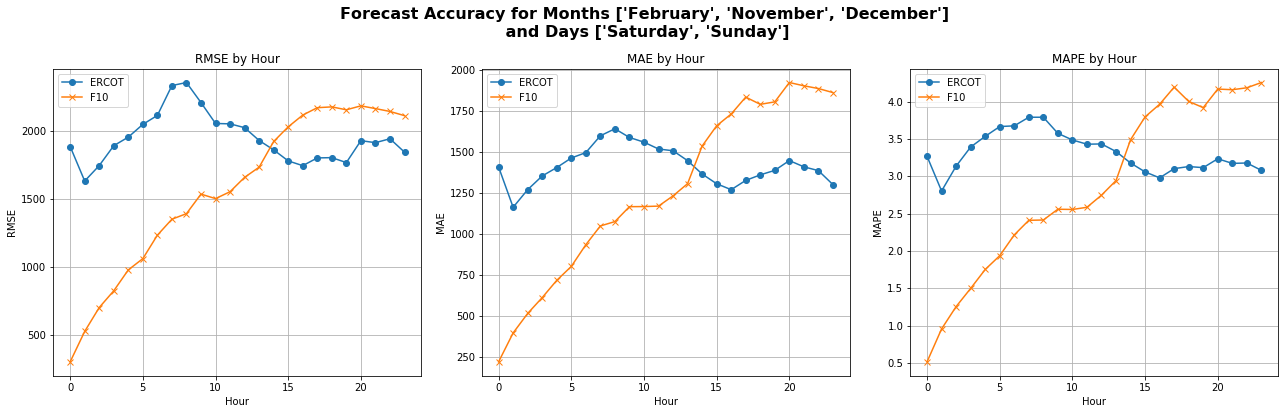

In [457]:
df_metrics = generate_hourly_metrics("../model_outputs/F10_erco_2023_example_outputs.json",
                       months=[1,10,11],
                       days=[5,6], 
                       month_idx=6,
                       mean=43558.95,
                       std=10011.015,)

/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/aidanwiteck/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


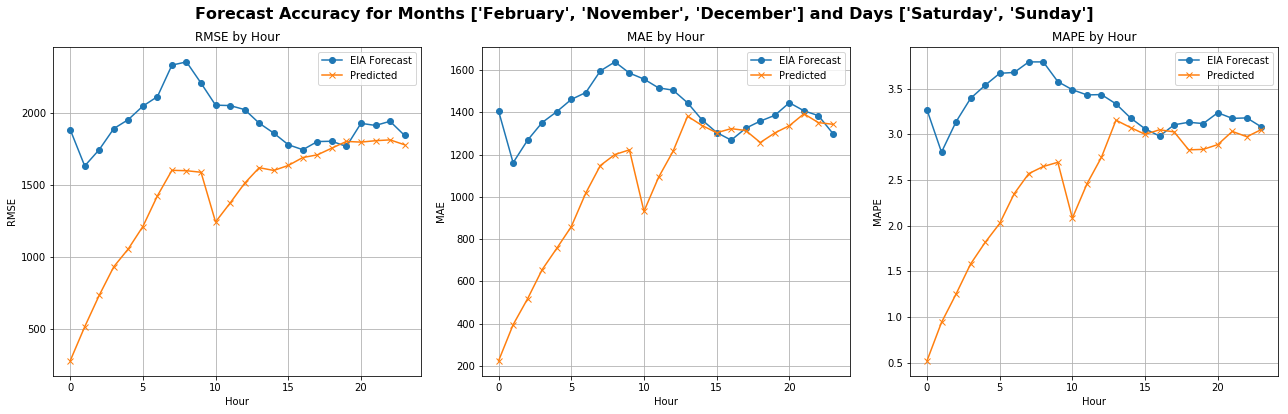

In [274]:
df_metrics = generate_hourly_metrics("../model_outputs/F8_erco_2023_example_outputs.json",
                       months=[1,10,11],
                       days=[5,6], 
                       month_idx=6,
                       mean=43558.95,
                       std=10011.015,)

In [549]:
df_metrics = generate_hourly_metrics("../model_outputs/ercot_s3_T24_example_outputs.json",
                       months=[1,10,11],
                       days=[5,6], 
                       month_idx=7,
                       mean=43558.95,
                       std=10011.015,
                       input_days=1)

ValueError: Length of values (2112) does not match length of index (2136)

In [534]:
with open("../model_outputs/A11_erco_2023_example_outputs.json", "r") as file:
    data = json.load(file)
    print(data["avg_mape"])
    print(data["avg_rmse"])


1.7704097032546997
0.1782979965209961


In [539]:
mean=44314.12165969092
std= 10542.407124135312

In [550]:
eia_data = pd.read_csv("../data/final_tables/erco/erco_train.csv")

print(std*eia_data["Normalized Forecast"] + mean)
print(rmse(eia_data["Normalized Forecast"], eia_data["Normalized Demand"]))
print(mean_absolute_error(eia_data["Normalized Forecast"], eia_data["Normalized Demand"]))


# print(np.std(eia_data["Normalized Forecast"]))
# data_2023 = eia_data[eia_data["year"]==]

# actual_month = month+1

# eia_forecast_data = data_2023[data_2023["month"]==actual_month]["Normalized Forecast"].tolist()

0        36278.0
1        34382.0
2        34078.0
3        33807.0
4        33524.0
          ...   
61363    46097.0
61364    44529.0
61365    42909.0
61366    41633.0
61367    40035.0
Name: Normalized Forecast, Length: 61368, dtype: float64
0.16747769550246916
0.10720563953482323


In [551]:
eia_data

timestamp  Demand (MWh)  Demand Forecast (MWh)  \
0      2016-01-01 00:00:00       34680.0                36278.0   
1      2016-01-01 01:00:00       33846.0                34382.0   
2      2016-01-01 02:00:00       33427.0                34078.0   
3      2016-01-01 03:00:00       33086.0                33807.0   
4      2016-01-01 04:00:00       33048.0                33524.0   
...                    ...           ...                    ...   
61363  2022-12-31 19:00:00       41852.0                46097.0   
61364  2022-12-31 20:00:00       41114.0                44529.0   
61365  2022-12-31 21:00:00       39902.0                42909.0   
61366  2022-12-31 22:00:00       38892.0                41633.0   
61367  2022-12-31 23:00:00       37731.0                40035.0   

       Net Generation (MWh) Region  Normalized Demand  Normalized Forecast  \
0                   34655.0   erco          -0.913845            -0.762266   
1                   33886.0   erco          -0.992954            -0.942111   
2                   33469.0   erco          -1.032698            -0.970947   
3                   33129.0   erco          -1.065043            -0.996653   
4                   33090.0   erco          -1.068648            -1.023497   
...                     ...    ...                ...                  ...   
61363               41867.0   erco          -0.233545             0.169115   
61364               41291.0   erco          -0.303548             0.020382   
61365               40582.0   erco          -0.418512            -0.133283   
61366               39902.0   erco          -0.514315            -0.254318   
61367               38747.0   erco          -0.624442            -0.405896   

       temperature_1  humidity_1  cloudcover_1  ...  humidity_6  cloudcover_6  \
0          -1.564565    0.480726      1.555971  ...    2.121060      2.628561   
1          -1.618373    0.653263      1.555971  ...    2.077309      2.628561   
2          -1.658730    0.365701      1.555971  ...    1.989806      2.628561   
3          -1.658730    0.193164      1.555971  ...    1.989806      2.628561   
4          -1.672182    0.078140      1.555971  ...    1.946055      2.628561   
...              ...         ...           ...  ...         ...           ...   
61363      -0.394236   -0.209422     -1.153402  ...   -0.547768      0.134095   
61364      -0.448044   -0.209422     -1.153402  ...   -0.416514     -0.068159   
61365      -0.622921    0.250677     -1.153402  ...   -0.329011      0.235222   
61366      -0.757441    0.768288     -0.882465  ...   -0.197758     -0.304122   
61367      -0.784345    1.055850     -0.801184  ...   -0.066504      0.032968   

       windspeed_6  precipitation_6  year  month  day_of_week  day  hour  \
0         0.477293        -0.108163     1      0            4    0     0   
1         0.435506        -0.108163     1      0            4    0     1   
2         0.338005         0.147122     1      0            4    0     2   
3         0.491221        -0.108163     1      0            4    0     3   
4         0.588722        -0.108163     1      0            4    0     4   
...            ...              ...   ...    ...          ...  ...   ...   
61363     0.170861        -0.108163     7     11            5   30    19   
61364     0.519079        -0.108163     7     11            5   30    20   
61365     0.407649        -0.108163     7     11            5   30    21   
61366     0.212647        -0.108163     7     11            5   30    22   
61367     0.449435        -0.108163     7     11            5   30    23   

       is_holiday  
0               1  
1               1  
2               1  
3               1  
4               1  
...           ...  
61363           0  
61364           0  
61365           0  
61366           0  
61367           0  

[61368 rows x 43 columns]

In [35]:
def generate_month_forecast_figure_unnormalized_ercot(month=0, 
                                                save=False):
    actual_month = month+1
    
    eia_data = pd.read_csv("../data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv")
    data_2023 = eia_data[(eia_data["2023"]==1) & (eia_data["year"]==2023)]    
    
    predicted = data_2023[data_2023["month"]==actual_month]["Demand Forecast (MWh)"].tolist()
    observed = data_2023[data_2023["month"]==actual_month]["Demand (MWh)"].tolist()
    
    predicted = np.array(predicted)
    observed = np.array(observed)
    
    plt.figure(figsize=(16, 6))  # Set the figure size for better visibility
    plt.plot(observed,linestyle='-', c='r', marker='.', linewidth=1, alpha=0.7, label="Observed")
    plt.plot(predicted,linestyle='-', c='b', marker='.', alpha=0.7, label="ERCOT 24h Forecast")
    plt.xlabel('Hour')
    plt.ylabel('Demand (MWh)')
    plt.legend()
    
    if save:
        print("saving")
        plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_{actual_month}_predictions.pdf", 
                    format="pdf", 
                    bbox_inches="tight")
        print("Saved")
    plt.show()

    
    model_rmse = rmse(predicted, observed)
    model_mae = mean_absolute_error(observed, predicted)
    model_mape = mape(observed, predicted)

    print(f"Model RMSE: {model_rmse}")
    print(f"Model MAE: {model_mae}")
    print(f"Model MAPE: {model_mape}")
    return (model_rmse, model_mae, model_mape)


saving
Saved


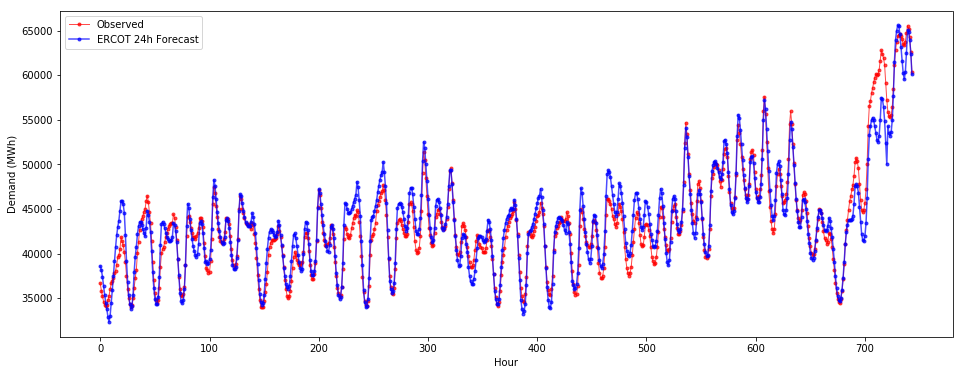

Model RMSE: 1673.8016745417974
Model MAE: 1246.8844086021506
Model MAPE: 2.833692552446828
saving
Saved


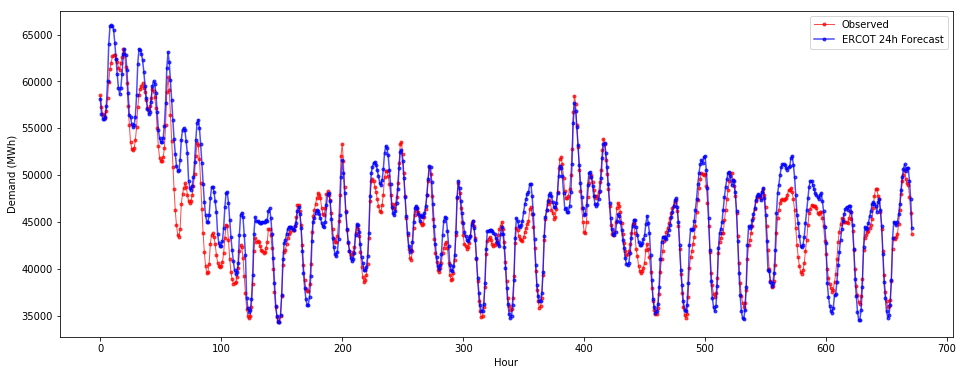

Model RMSE: 1990.2786607210128
Model MAE: 1512.65625
Model MAPE: 3.3624260046965246
saving
Saved


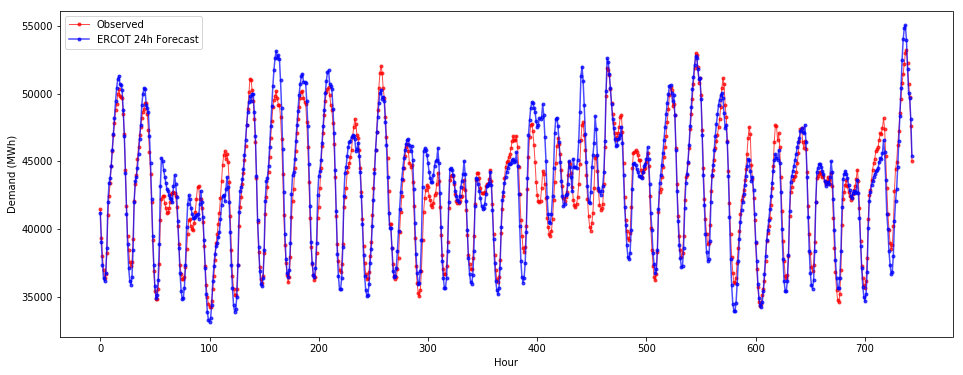

Model RMSE: 1393.3433060622165
Model MAE: 1058.8024193548388
Model MAPE: 2.4738989592860228
saving
Saved


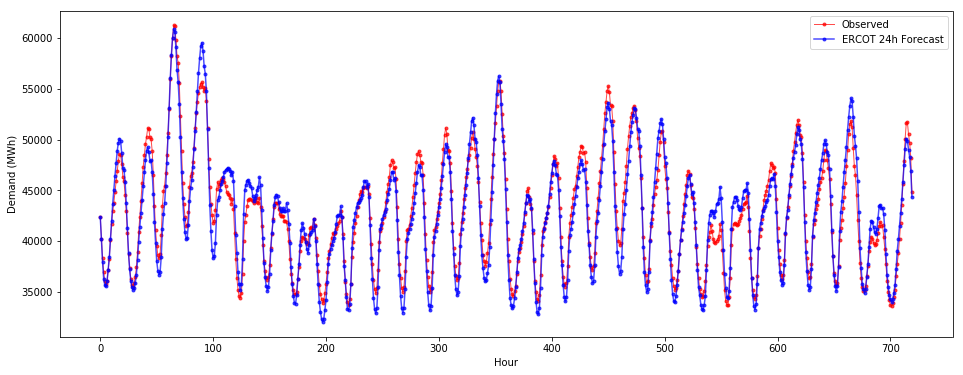

Model RMSE: 1372.6731868065967
Model MAE: 1133.3
Model MAPE: 2.652692984804667
saving
Saved


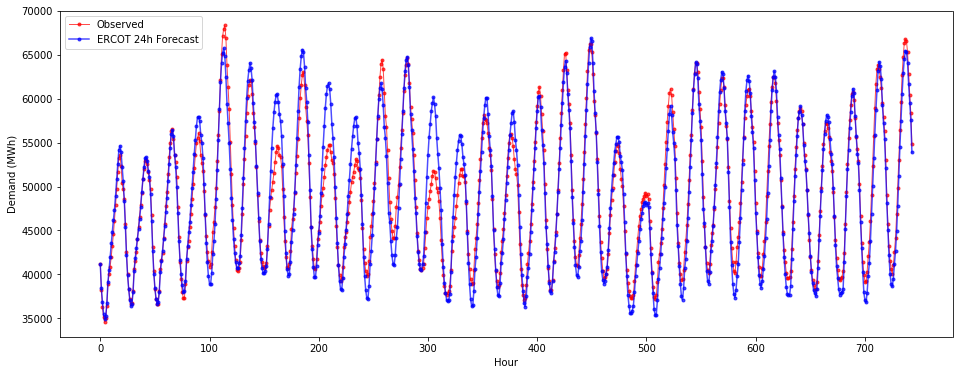

Model RMSE: 2009.6115811243842
Model MAE: 1442.3897849462367
Model MAPE: 2.9288417766299797
saving
Saved


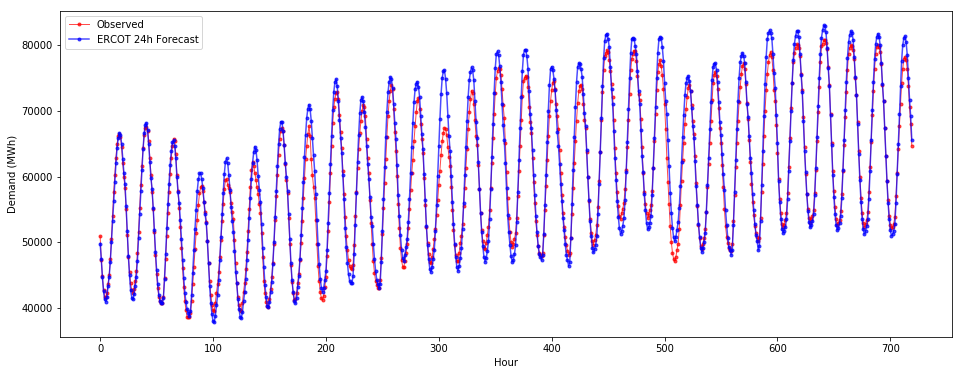

Model RMSE: 2163.493264504319
Model MAE: 1602.225
Model MAPE: 2.652494922276353
saving
Saved


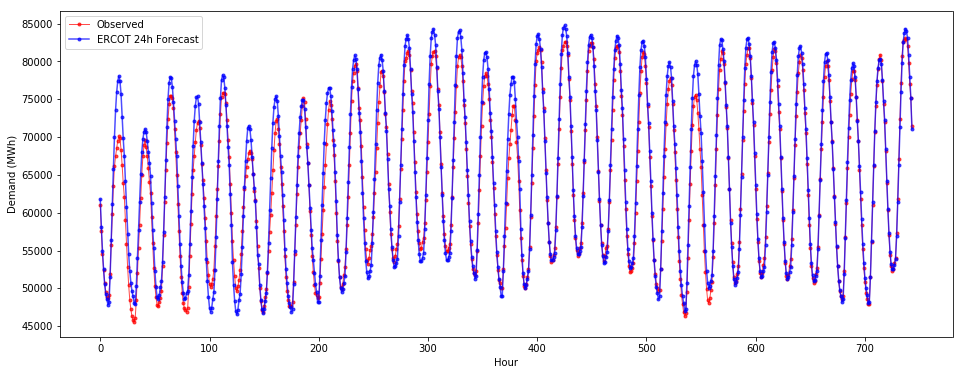

Model RMSE: 2020.864028588517
Model MAE: 1462.8978494623657
Model MAPE: 2.2756927656650143
saving
Saved


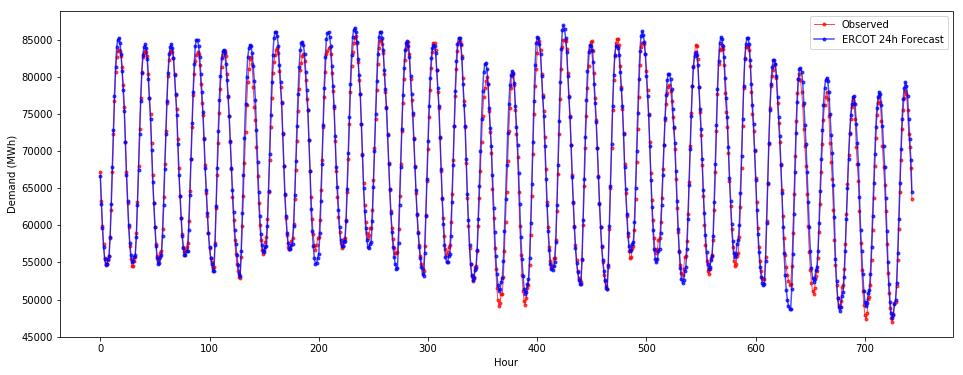

Model RMSE: 1364.6034045146243
Model MAE: 1057.715053763441
Model MAPE: 1.5925559644538532
saving
Saved


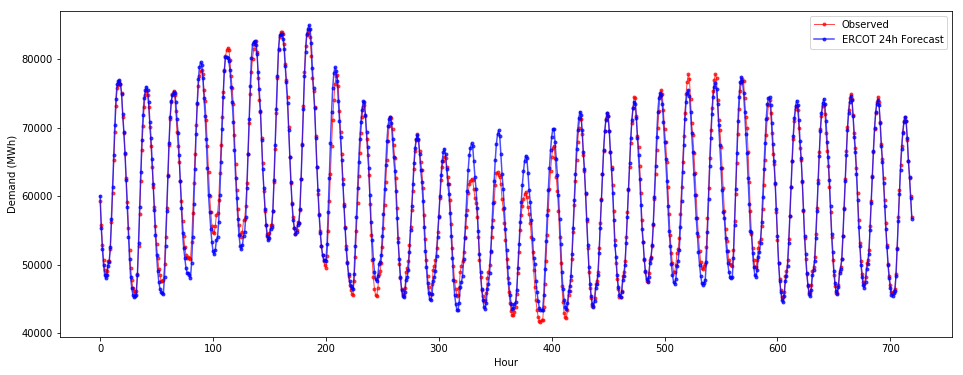

Model RMSE: 1632.454716489523
Model MAE: 1231.2652777777778
Model MAPE: 2.1145433103194633
saving
Saved


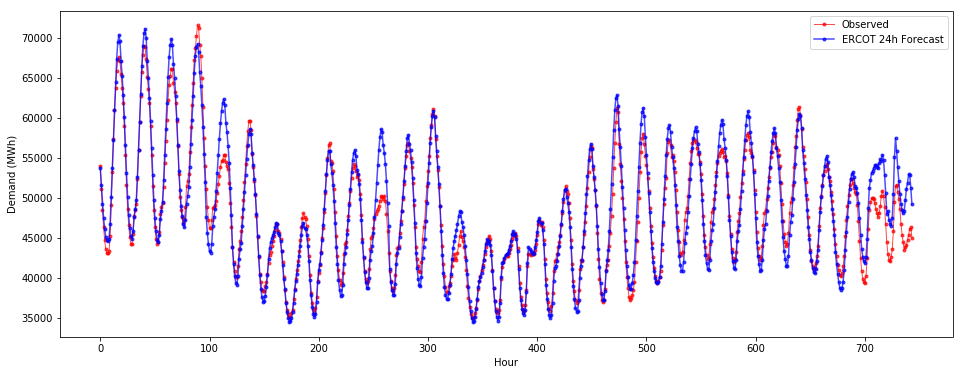

Model RMSE: 2016.7388678979544
Model MAE: 1426.1935483870968
Model MAPE: 2.951541456128582
saving
Saved


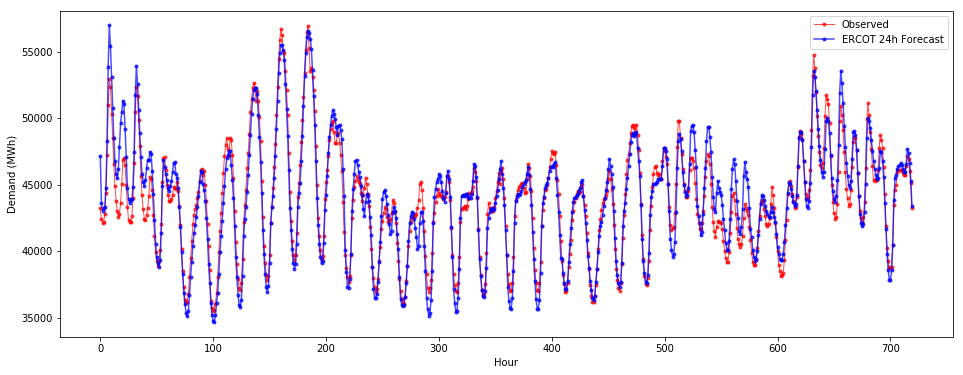

Model RMSE: 1230.9651402005213
Model MAE: 931.9319444444444
Model MAPE: 2.1234476729013987
saving
Saved


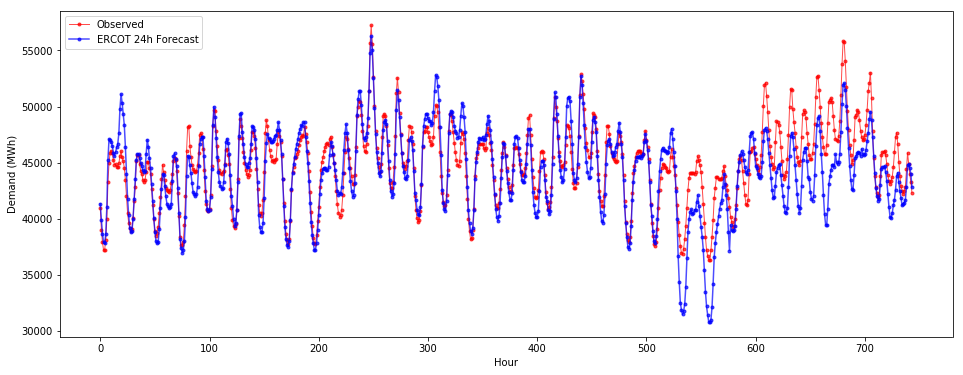

Model RMSE: 2046.2358514956766
Model MAE: 1498.4610215053763
Model MAPE: 3.334852120886679


In [37]:
errs=[]
for m in range(12):
    r=generate_month_forecast_figure_unnormalized_ercot(month=m, save=True)
    errs.append(r)

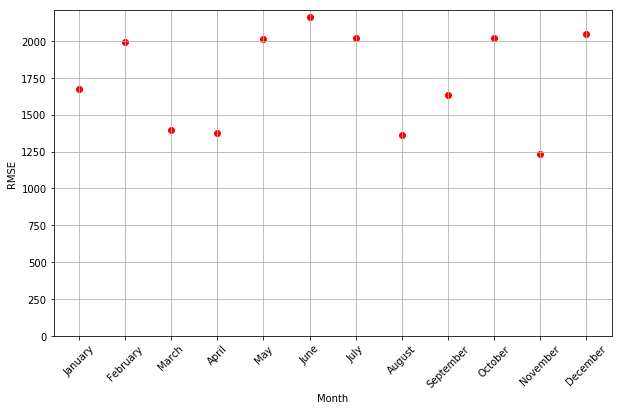

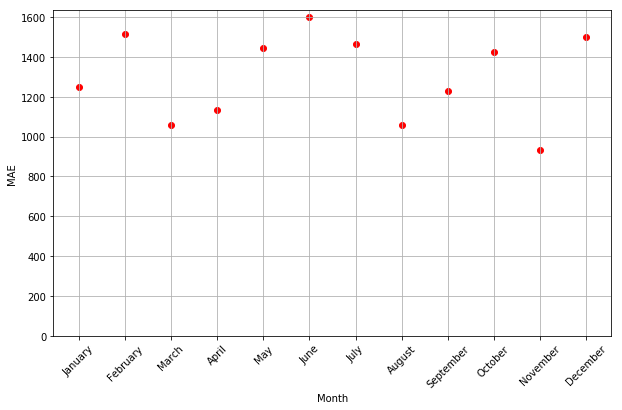

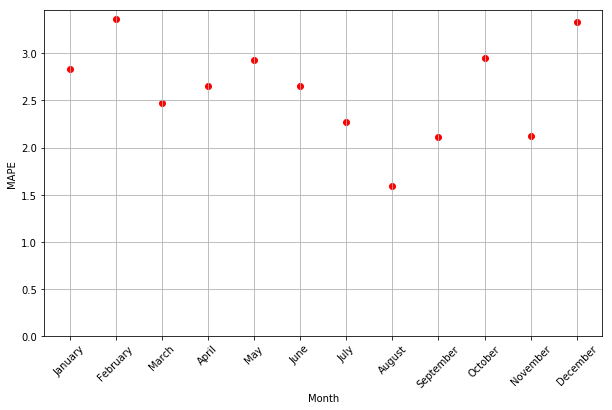

In [39]:
# Unpack the tuples into separate lists
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

rmses = [err[0] for err in errs]
maes = [err[1] for err in errs]
mapes = [err[2] for err in errs]

plt.figure(figsize=(10, 6))
plt.scatter(month_names, rmses, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('RMSE')
plt.ylim(bottom=0)
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_monthly_rmse.pdf", 
            format="pdf", 
            bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(month_names,  maes, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('MAE')
plt.ylim(bottom=0)
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_monthly_mae.pdf", 
            format="pdf", 
            bbox_inches="tight")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(month_names, mapes, marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('MAPE')
plt.ylim(bottom=0)
plt.grid(True)
plt.xticks(rotation=45)
plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_monthly_mape.pdf", 
            format="pdf", 
            bbox_inches="tight")
plt.show()

In [40]:
rmses

[1673.8016745417974,
 1990.2786607210128,
 1393.3433060622165,
 1372.6731868065967,
 2009.6115811243842,
 2163.493264504319,
 2020.864028588517,
 1364.6034045146243,
 1632.454716489523,
 2016.7388678979544,
 1230.9651402005213,
 2046.2358514956766]

In [41]:
maes

[1246.8844086021506,
 1512.65625,
 1058.8024193548388,
 1133.3,
 1442.3897849462367,
 1602.225,
 1462.8978494623657,
 1057.715053763441,
 1231.2652777777778,
 1426.1935483870968,
 931.9319444444444,
 1498.4610215053763]

In [42]:
mapes

[2.833692552446828,
 3.3624260046965246,
 2.4738989592860228,
 2.652692984804667,
 2.9288417766299797,
 2.652494922276353,
 2.2756927656650143,
 1.5925559644538532,
 2.1145433103194633,
 2.951541456128582,
 2.1234476729013987,
 3.334852120886679]